In [16]:
import glob
import xarray as xr
import netCDF4
import h5netcdf
import scipy
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [17]:
ds=xr.open_dataset('../data/ready_sic_sst_data.nc')
sst=ds.sst
sic=ds.sic

In [18]:
sst

<xarray.DataArray 'sst' (time: 46, latitude: 160, longitude: 1440)>
[10598400 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1979-09-01 1980-09-01 ... 2024-09-01
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... 50.75 50.5 50.25
  * longitude  (longitude) float64 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
Attributes: (12/32)
    GRIB_paramId:                             34
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      404640
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avgua
    ...                                       ...
    GRIB_units:                               K
    long_name:                                Sea surface temperature
    units:                                    K
    standard_name:                            unknown
    GRIB_surface:                             0.0
    coordinates:                              number date latitude longitude ...

In [19]:
sic

<xarray.DataArray 'sic' (time: 46, latitude: 160, longitude: 1440)>
[10598400 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1979-09-01 1980-09-01 ... 2024-09-01
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... 50.75 50.5 50.25
  * longitude  (longitude) float64 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
Attributes: (12/32)
    GRIB_paramId:                             31
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      404640
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avgua
    ...                                       ...
    GRIB_units:                               (0 - 1)
    long_name:                                Sea ice area fraction
    units:                                    (0 - 1)
    standard_name:                            sea_ice_area_fraction
    GRIB_surface:                             0.0
    coordinates:                              number date latitude longitude ...

In [20]:
sst_september = sst

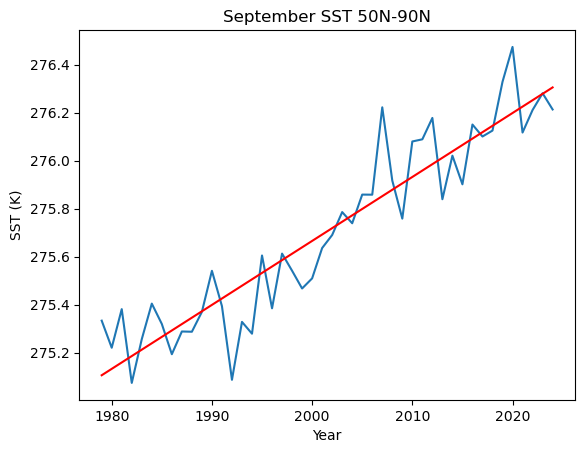

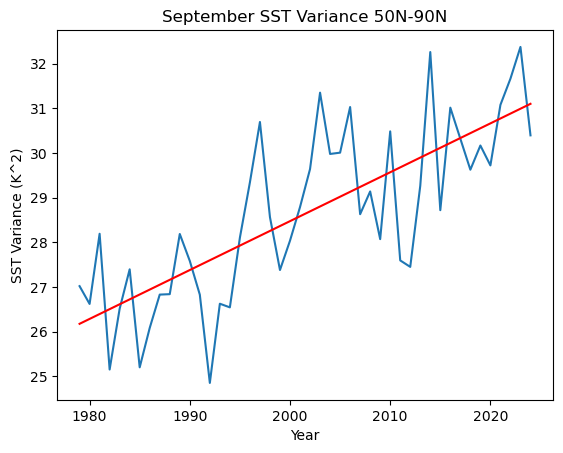

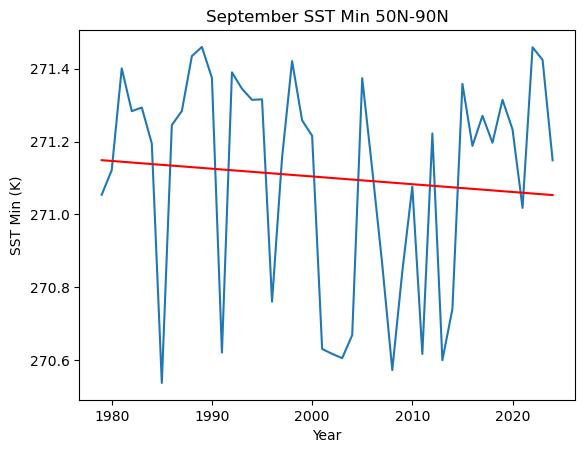

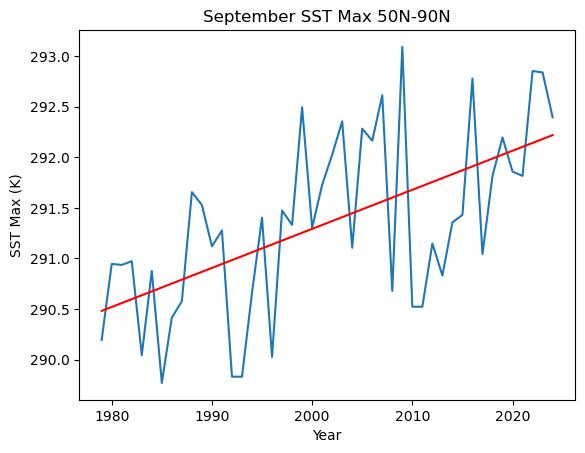

In [21]:
# Monthly meana values in K
sst_monthly_mean = sst_september.mean(dim=['latitude', 'longitude'])
sst_monthly_mean.values
plt.plot(np.arange(1979,2024+1,1), sst_monthly_mean.values)
# Linregress
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.arange(1979,2024+1,1), sst_monthly_mean.values)
plt.plot(np.arange(1979,2024+1,1), slope*np.arange(1979,2024+1,1) + intercept, 'r')
# Plot labels
plt.xlabel('Year')
plt.ylabel('SST (K)')
plt.title('September SST 50N-90N')
plt.show()
# Caluclate the varience of the SST in this dataset - caluclate the varience of the SST in this dataset across the domain
sst_sept_var=sst_september.var(dim=['latitude', 'longitude']).values
plt.plot(np.arange(1979,2024+1,1), sst_sept_var)
# Linregress
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.arange(1979,2024+1,1), sst_sept_var)
plt.plot(np.arange(1979,2024+1,1), slope*np.arange(1979,2024+1,1) + intercept, 'r')
# Plot labels
plt.xlabel('Year')
plt.ylabel('SST Variance (K^2)')
plt.title('September SST Variance 50N-90N') # Varience increases over time
plt.show()
# Now plot the minimum sst values in the dataset over time
sst_sept_min=sst_september.min(dim=['latitude', 'longitude']).values
plt.plot(np.arange(1979,2024+1,1), sst_sept_min)
# Linregress
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.arange(1979,2024+1,1), sst_sept_min)
plt.plot(np.arange(1979,2024+1,1), slope*np.arange(1979,2024+1,1) + intercept, 'r')
# Plot labels
plt.xlabel('Year')
plt.ylabel('SST Min (K)')
plt.title('September SST Min 50N-90N') # SST min is decreasing
plt.show()

#Now plot the maximum sst values in the dataset over time
sst_sept_max=sst_september.max(dim=['latitude', 'longitude']).values
plt.plot(np.arange(1979,2024+1,1), sst_sept_max)
# Linregress
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.arange(1979,2024+1,1), sst_sept_max)
plt.plot(np.arange(1979,2024+1,1), slope*np.arange(1979,2024+1,1) + intercept, 'r')
# Plot labels
plt.xlabel('Year')
plt.ylabel('SST Max (K)')
plt.title('September SST Max 50N-90N') # SST max is increasing
plt.show()




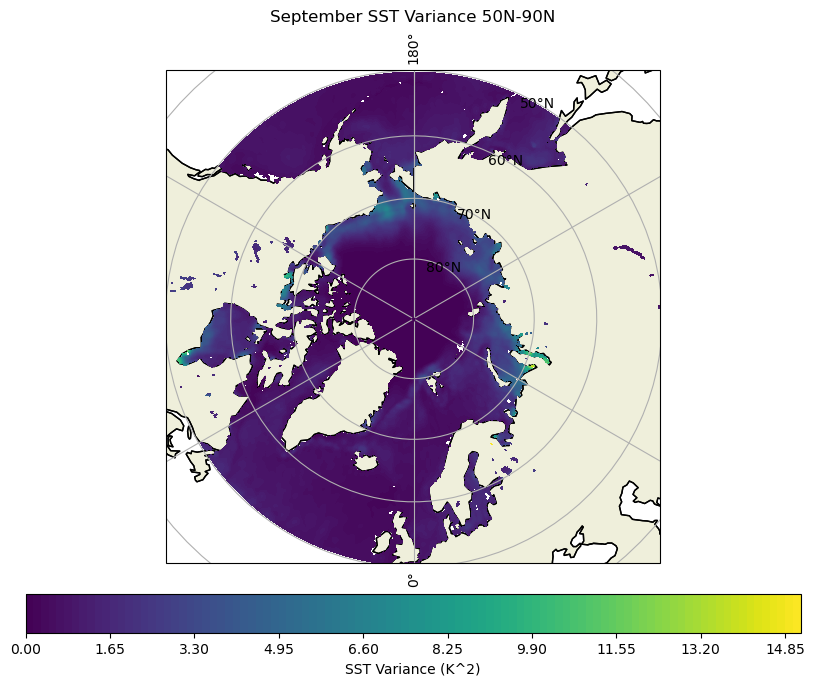

In [22]:
# Now plot varience of SST across the domain e.g. dim='time'
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='black')
ax.add_feature(cfeature.COASTLINE, zorder=1, edgecolor='black')
ax.gridlines(draw_labels=True)

sst_sept_var_domain = sst_september.var(dim=['time']).values
lon, lat = np.meshgrid(sst_september.longitude, sst_september.latitude)
contour = ax.contourf(lon, lat, sst_sept_var_domain, levels=100, transform=ccrs.PlateCarree(), cmap='viridis')
cbar = plt.colorbar(contour, orientation='horizontal', pad=0.05)
cbar.set_label('SST Variance (K^2)')

plt.title('September SST Variance 50N-90N')
plt.show()

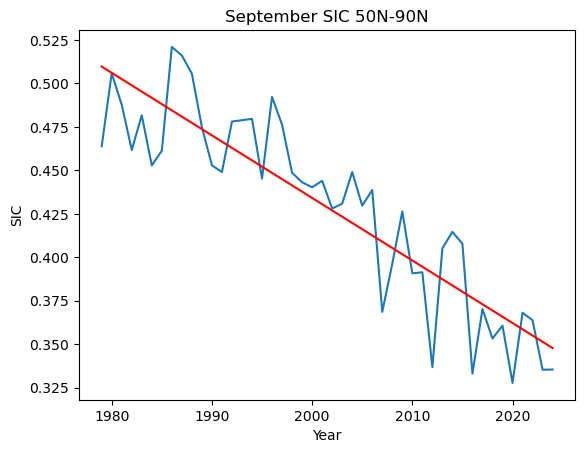

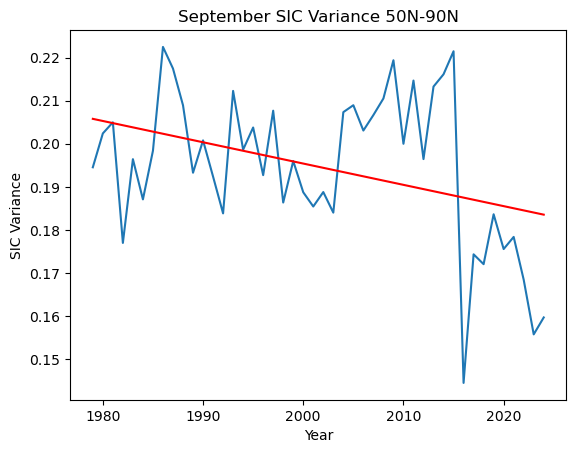

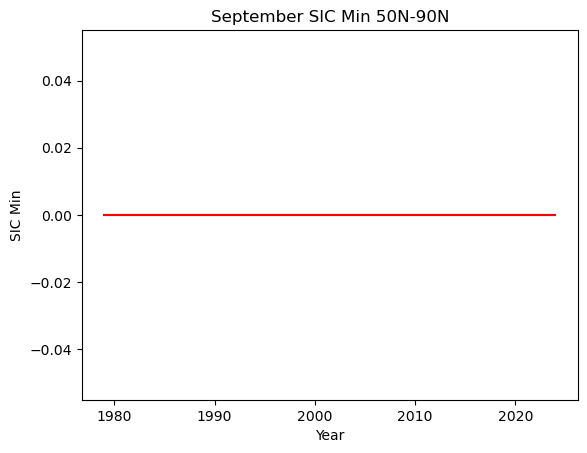

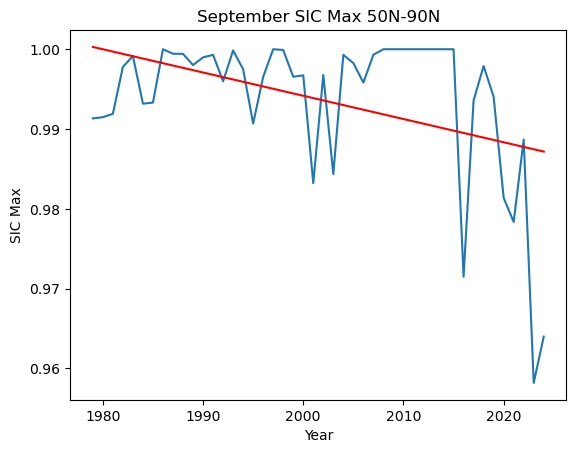

In [23]:
# Monthly mean values in K
sic_monthly_mean = sic.mean(dim=['latitude', 'longitude'])
sic_monthly_mean.values
plt.plot(np.arange(1979, 2024 + 1, 1), sic_monthly_mean.values)
# Linregress
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.arange(1979, 2024 + 1, 1), sic_monthly_mean.values)
plt.plot(np.arange(1979, 2024 + 1, 1), slope * np.arange(1979, 2024 + 1, 1) + intercept, 'r')
# Plot labels
plt.xlabel('Year')
plt.ylabel('SIC')
plt.title('September SIC 50N-90N')
plt.show()
# Calculate the variance of the SIC in this dataset across the domain
sic_sept_var = sic.var(dim=['latitude', 'longitude']).values
plt.plot(np.arange(1979, 2024 + 1, 1), sic_sept_var)
# Linregress
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.arange(1979, 2024 + 1, 1), sic_sept_var)
plt.plot(np.arange(1979, 2024 + 1, 1), slope * np.arange(1979, 2024 + 1, 1) + intercept, 'r')
# Plot labels
plt.xlabel('Year')
plt.ylabel('SIC Variance')
plt.title('September SIC Variance 50N-90N')
plt.show()
# Now plot the minimum SIC values in the dataset over time
sic_sept_min = sic.min(dim=['latitude', 'longitude']).values
plt.plot(np.arange(1979, 2024 + 1, 1), sic_sept_min)
# Linregress
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.arange(1979, 2024 + 1, 1), sic_sept_min)
plt.plot(np.arange(1979, 2024 + 1, 1), slope * np.arange(1979, 2024 + 1, 1) + intercept, 'r')
# Plot labels
plt.xlabel('Year')
plt.ylabel('SIC Min')
plt.title('September SIC Min 50N-90N')
plt.show()

# Now plot the maximum SIC values in the dataset over time
sic_sept_max = sic.max(dim=['latitude', 'longitude']).values
plt.plot(np.arange(1979, 2024 + 1, 1), sic_sept_max)
# Linregress
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.arange(1979, 2024 + 1, 1), sic_sept_max)
plt.plot(np.arange(1979, 2024 + 1, 1), slope * np.arange(1979, 2024 + 1, 1) + intercept, 'r')
# Plot labels
plt.xlabel('Year')
plt.ylabel('SIC Max')
plt.title('September SIC Max 50N-90N')
plt.show()


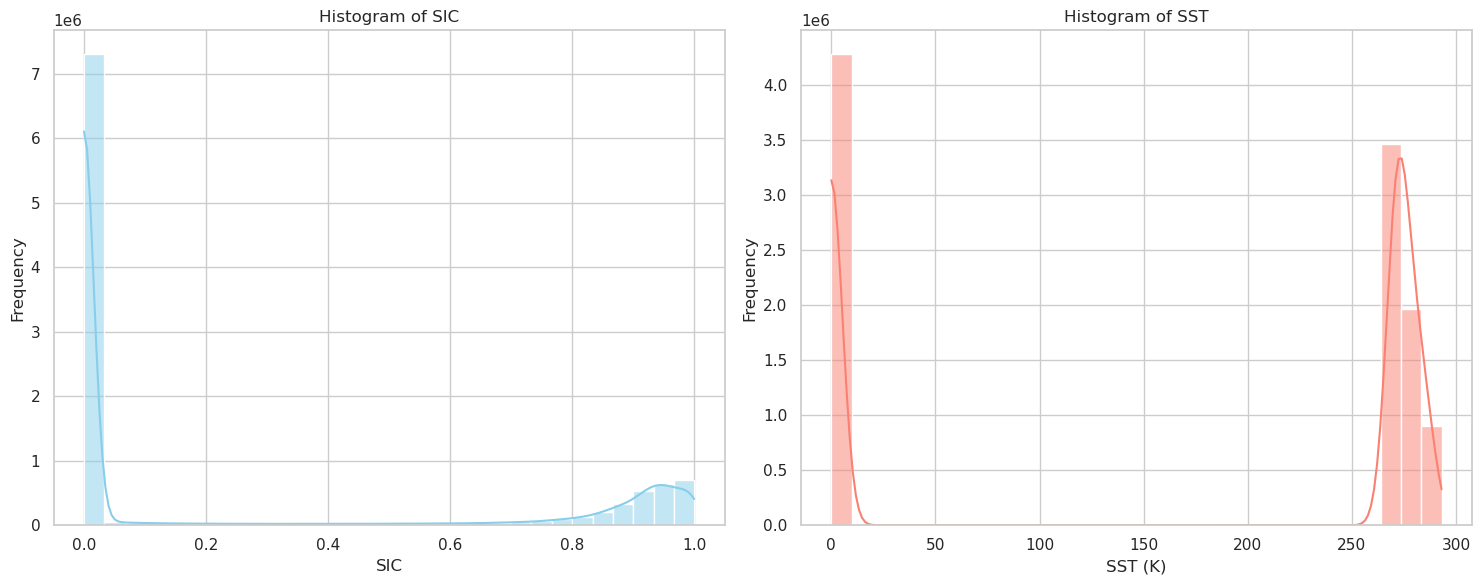

In [31]:
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot histogram for SIC
sns.histplot(sic.values.flatten(), bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Histogram of SIC')
axes[0].set_xlabel('SIC')
axes[0].set_ylabel('Frequency')

# Plot histogram for SST
sns.histplot(sst.values.flatten(), bins=30, kde=True, color='salmon', ax=axes[1])
axes[1].set_title('Histogram of SST')
axes[1].set_xlabel('SST (K)')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

NOTE!! In the above figure 0k for SST means land... This is just part of the land mask

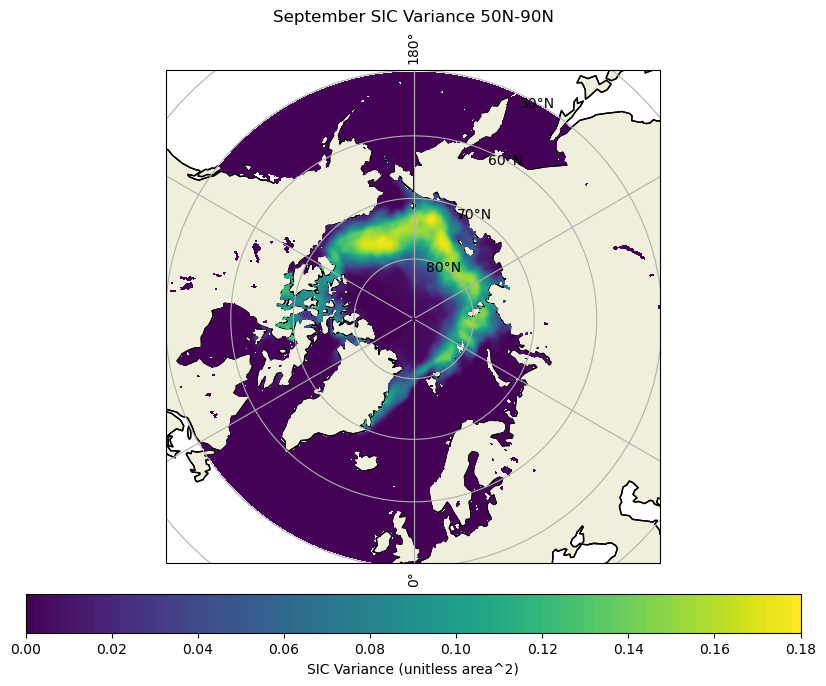

In [24]:
# Now plot variance of SIC across the domain e.g. dim='time'
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='black')
ax.add_feature(cfeature.COASTLINE, zorder=1, edgecolor='black')
ax.gridlines(draw_labels=True)

sic_sept_var_domain = sic.var(dim=['time']).values
lon, lat = np.meshgrid(sic.longitude, sic.latitude)
contour = ax.contourf(lon, lat, sic_sept_var_domain, levels=100, transform=ccrs.PlateCarree(), cmap='viridis')
cbar = plt.colorbar(contour, orientation='horizontal', pad=0.05)
cbar.set_label('SIC Variance (unitless area^2)')

plt.title('September SIC Variance 50N-90N')
plt.show()

In [25]:
sst.longitude

<xarray.DataArray 'longitude' (longitude: 1440)>
array([-180.  , -179.75, -179.5 , ...,  179.25,  179.5 ,  179.75])
Coordinates:
  * longitude  (longitude) float64 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
Attributes:
    units:          degrees_east
    standard_name:  longitude
    long_name:      longitude

In [26]:
# List of bounding box coordinates
# Each box is represented as [min_lon, max_lon, min_lat, max_lat]
boxes = [
    [-180, -140, 50, 70],  # Bering Sea and parts of North Pacific
    [-140, -100, 50, 70],  # Gulf of Alaska and coast
    [-100, -60, 50, 70],   # Hudson Bay and Labrador Sea
    [-60, -20, 50, 70],    # North Atlantic and Greenland Sea
    [-20, 20, 50, 70],     # Eastern Atlantic and parts of Europe
    [20, 60, 50, 70],      # Barents Sea
    [60, 100, 50, 70],     # Kara Sea
    [100, 140, 50, 70],    # Laptev Sea
    [140, 180, 50, 70],    # East Siberian Sea
    [-180, -140, 70, 90],  # Arctic Ocean (Chukchi Sea)
    [-140, -100, 70, 90],  # Beaufort Sea
    [-100, -60, 70, 90],   # Canadian Arctic Archipelago
    [-60, -20, 70, 90],    # Greenland and Fram Strait
    [-20, 20, 70, 90],     # Central Arctic Ocean
    [20, 60, 70, 90],      # Barents and Kara Sea (high Arctic)
    [60, 100, 70, 90],     # Laptev and East Siberian Sea
    [100, 140, 70, 90],    # Arctic Ocean (high latitude)
    [140, 180, 70, 90],    # Arctic Ocean (Bering Strait vicinity)
]
# Array of box names
box_names = [
    "Bering Sea and parts of North Pacific",
    "Gulf of Alaska and coast",
    "Hudson Bay and Labrador Sea",
    "North Atlantic and Greenland Sea",
    "Eastern Atlantic and parts of Europe",
    "Barents Sea",
    "Kara Sea",
    "Laptev Sea",
    "East Siberian Sea",
    "Arctic Ocean (Chukchi Sea)",
    "Beaufort Sea",
    "Canadian Arctic Archipelago",
    "Greenland and Fram Strait",
    "Central Arctic Ocean",
    "Barents and Kara Sea (high Arctic)",
    "Laptev and East Siberian Sea",
    "Arctic Ocean (high latitude)",
    "Arctic Ocean (Bering Strait vicinity)"
]

# Fill NaN values with 0 for SIC and SST
sic_filled = sic.fillna(0)
sst_filled = sst.fillna(0)

# Initialize lists to store mean SIC and SST values for each box
mean_sic_values = []
mean_sst_values = []

# Loop through each box and calculate the mean SIC and SST
for box in boxes:
    min_lon, max_lon, min_lat, max_lat = box
    sic_box = sic_filled.sel(longitude=slice(min_lon, max_lon), latitude=slice(max_lat, min_lat))
    sst_box = sst_filled.sel(longitude=slice(min_lon, max_lon), latitude=slice(max_lat, min_lat))
    mean_sic_values.append(sic_box.mean(dim=['latitude', 'longitude']).values)
    mean_sst_values.append(sst_box.mean(dim=['latitude', 'longitude']).values)
    for name, sic_value, sst_value in zip(box_names, mean_sic_values, mean_sst_values):
        print(f"Box: {name}, Mean SIC: {sic_value[0]}, Mean SST: {sst_value[0]}")


Box: Bering Sea and parts of North Pacific, Mean SIC: 0.0012695217737928033, Mean SST: 181.87049865722656
Box: Bering Sea and parts of North Pacific, Mean SIC: 0.0012695217737928033, Mean SST: 181.87049865722656
Box: Gulf of Alaska and coast, Mean SIC: 0.014161345548927784, Mean SST: 44.30286407470703
Box: Bering Sea and parts of North Pacific, Mean SIC: 0.0012695217737928033, Mean SST: 181.87049865722656
Box: Gulf of Alaska and coast, Mean SIC: 0.014161345548927784, Mean SST: 44.30286407470703
Box: Hudson Bay and Labrador Sea, Mean SIC: 0.028283823281526566, Mean SST: 106.14221954345703
Box: Bering Sea and parts of North Pacific, Mean SIC: 0.0012695217737928033, Mean SST: 181.87049865722656
Box: Gulf of Alaska and coast, Mean SIC: 0.014161345548927784, Mean SST: 44.30286407470703
Box: Hudson Bay and Labrador Sea, Mean SIC: 0.028283823281526566, Mean SST: 106.14221954345703
Box: North Atlantic and Greenland Sea, Mean SIC: 9.202661203744356e-06, Mean SST: 220.33847045898438
Box: Bering 

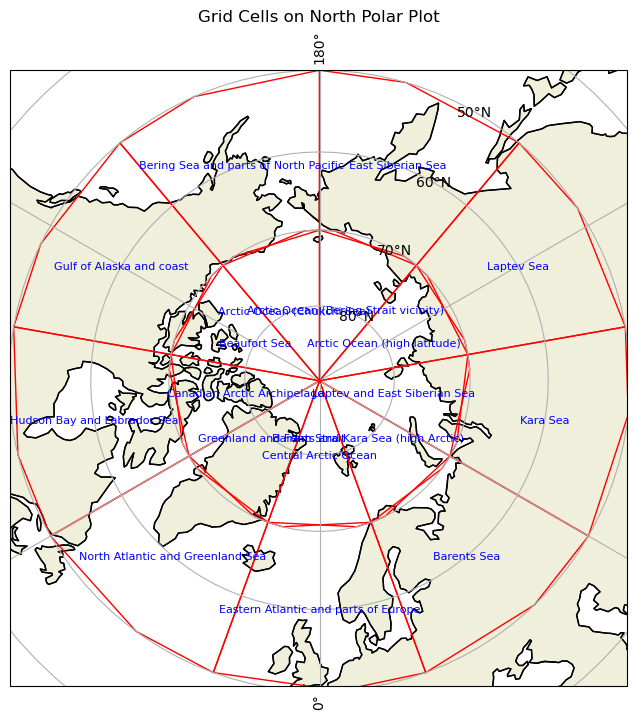

In [27]:
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='black')
ax.add_feature(cfeature.COASTLINE, zorder=1, edgecolor='black')
ax.gridlines(draw_labels=True)

# Plot each box on the map
for box, name in zip(boxes, box_names):
    min_lon, max_lon, min_lat, max_lat = box
    ax.add_patch(plt.Rectangle((min_lon, min_lat), max_lon - min_lon, max_lat - min_lat,
                               linewidth=1, edgecolor='r', facecolor='none', transform=ccrs.PlateCarree()))
    ax.text((min_lon + max_lon) / 2, (min_lat + max_lat) / 2, name, transform=ccrs.PlateCarree(),
            horizontalalignment='center', verticalalignment='center', fontsize=8, color='blue')

plt.title('Grid Cells on North Polar Plot')
plt.show()

In [28]:
mean_sic_values=np.array(mean_sic_values)
mean_sst_values=np.array(mean_sst_values)
mean_sic_values_time=mean_sic_values.mean(axis=0)
mean_sst_values_time=mean_sst_values.mean(axis=0)

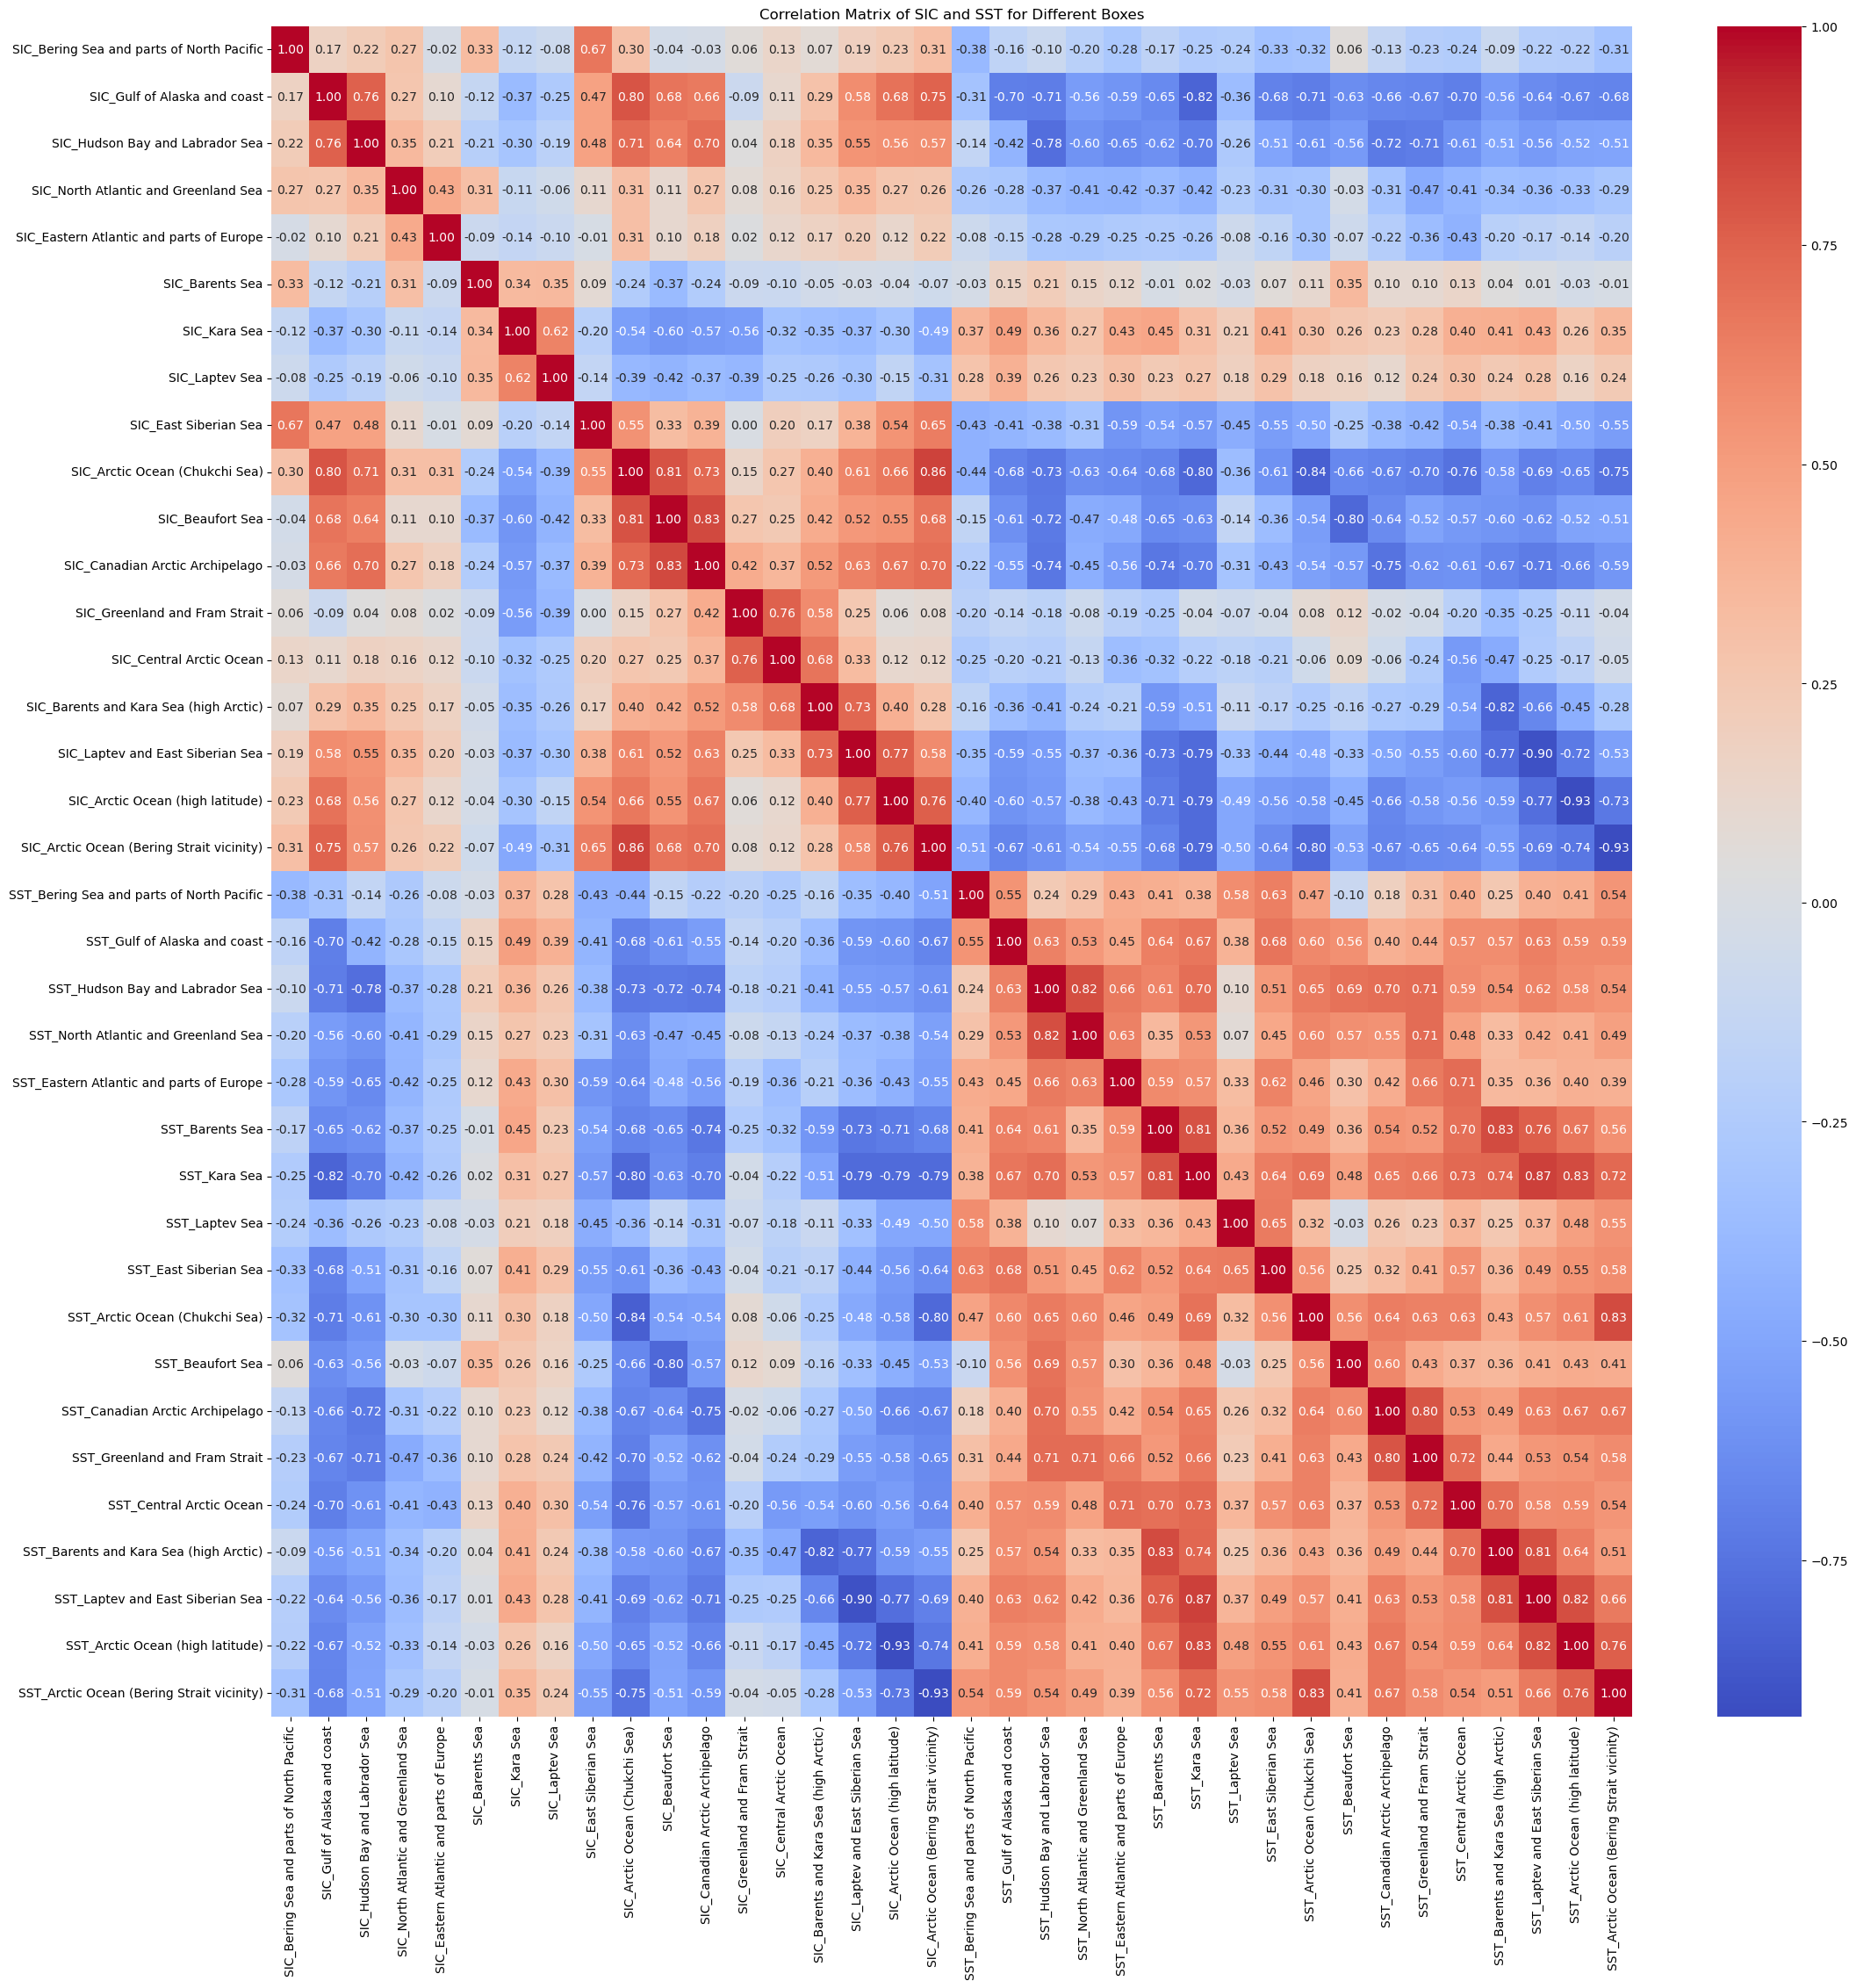

In [29]:
import seaborn as sns
import pandas as pd

# Create a DataFrame for the correlation matrix
corr_data = pd.DataFrame(mean_sic_values.T, columns=[f"SIC_{name}" for name in box_names])
corr_data = corr_data.join(pd.DataFrame(mean_sst_values.T, columns=[f"SST_{name}" for name in box_names]))

# Calculate the correlation matrix
corr_matrix = corr_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(25, 25))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)
plt.title('Correlation Matrix of SIC and SST for Different Boxes')
plt.show()

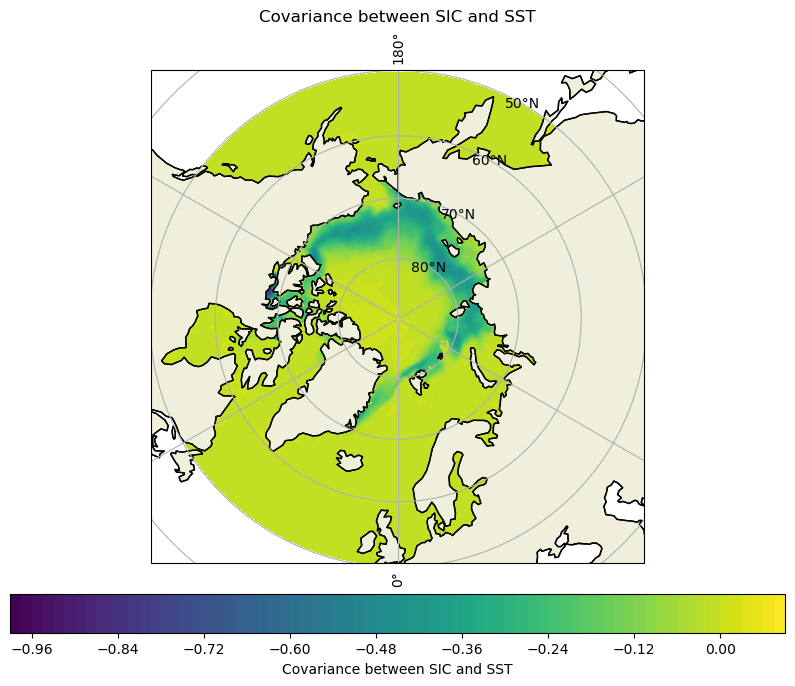

In [30]:
sst = sst.fillna(0)  # Fill missing values with 0
sic = sic.fillna(0)

# Ensure both arrays have the same shape
assert sst.shape == sic.shape, "SST and SIC must have the same shape."

# Initialize an empty array for covariance (lat x lon)
covariance = np.zeros((sst.shape[1], sst.shape[2]))

# Loop through each spatial point and calculate covariance across time
for i in range(sst.shape[1]):  # latitude
    for j in range(sst.shape[2]):  # longitude
        covariance[i, j] = np.cov(sst[:, i, j], sic[:, i, j])[0, 1]
# Plot the covariance
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
ax.gridlines(draw_labels=True)


# Create a meshgrid for plotting
lon, lat = np.meshgrid(sst.longitude.values, sst.latitude.values)
contour = ax.contourf(lon, lat, covariance, levels=100, transform=ccrs.PlateCarree(), cmap='viridis')
cbar = plt.colorbar(contour, orientation='horizontal', pad=0.05)
cbar.set_label('Covariance between SIC and SST')

ax.add_feature(cfeature.LAND, zorder=1, edgecolor='black')
ax.add_feature(cfeature.COASTLINE, zorder=1, edgecolor='black')

plt.title('Covariance between SIC and SST')
plt.show()

### Brief discussion on any patterns or insights observed during the analysis.
This is unfortunate. We have seen strong trends in increasing SST and decreasing SIC over time. Interestingly, although unsurprisingly, variance will not be a huge problem for later (future) sea ice predictions, as there will be less sea ice to vary. There is also a strong correlation between SST and SIC in a given September for a given grid cell, which makes sense. Had I more time I would have loved to have analyzed a smaller section of the Arctic Ocean with just North Atlantic temps (as they can regulate SST). Having such strong correlation/anticorrelations means we should be careful about reducing our data and choosing specific regions of interest when reducing our data. All in all, this data will be tricky to model due to its large non-linear trends over time. We also observed that the variance of SST and SIC shows significant spatial patterns, with higher variance in certain regions. This suggests that some areas are more sensitive to changes in temperature and ice cover. The covariance analysis between SST and SIC further highlights the strong relationship between these two variables, indicating that changes in sea surface temperature are closely linked to changes in sea ice concentration. This relationship is crucial for understanding the dynamics of the Arctic climate system and for making accurate predictions about future changes.